## Observations and Insights 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [92]:
# Checking the number of mice.
mouse_results.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [93]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_results
mouse_duplicates["Duplicate"] = mouse_results.duplicated(subset=["Mouse ID", "Timepoint"])
mouse_duplicates["Duplicate"].value_counts()

False    1888
True        5
Name: Duplicate, dtype: int64

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = mouse_duplicates.loc[mouse_duplicates["Duplicate"] == True]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [96]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_results.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [97]:
clean_mouse_results["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor = clean_mouse_results[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_mean = tumor.groupby(["Drug Regimen"]).mean()
tumor_median = tumor.groupby(["Drug Regimen"]).median()
tumor_variance = tumor.groupby(["Drug Regimen"]).var()
tumor_sd = tumor.groupby(["Drug Regimen"]).std()
tumor_sem = tumor.groupby(["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary dataframe
mm_merge = pd.merge(tumor_mean, tumor_median, on="Drug Regimen")
mm = mm_merge.rename(columns={"Tumor Volume (mm3)_x":"Average Volume", "Tumor Volume (mm3)_y":"Median Volume"})
mmv_merge = pd.merge(mm, tumor_variance, on="Drug Regimen")
mmv = mmv_merge.rename(columns={"Tumor Volume (mm3)":"Volume Variance"})
mmvs_merge = pd.merge(mmv, tumor_sd, on="Drug Regimen")
mmvs = mmvs_merge.rename(columns={"Tumor Volume (mm3)":"Volume Standard Deviation"})
mmvss_merge = pd.merge(mmv, tumor_sem, on="Drug Regimen")
mmvss = mmvss_merge.rename(columns={"Tumor Volume (mm3)":"Volume Standard Error"})
mmvss.head()

,Average Volume,Median Volume,Volume Variance,Volume Standard Error
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466


In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mmvss_agg = mmvss.aggregate

## Bar and Pie Charts

<AxesSubplot:>

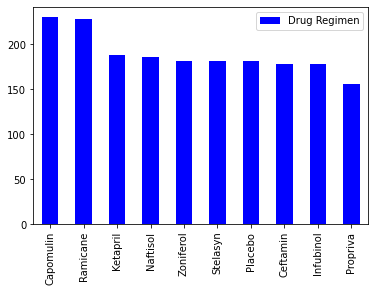

In [118]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_group = clean_mouse_results["Drug Regimen"].value_counts()
measurements_taken = pd.DataFrame(measure_group)
# measurements_taken = measurements_taken.rename(columns={"Drug Regimen": "Total Count"})

measurements_taken.plot.bar(color="blue")

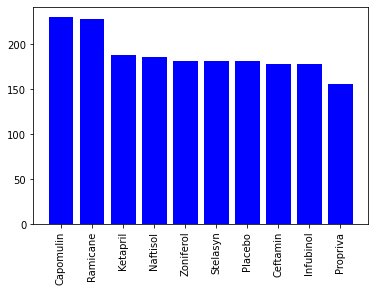

In [119]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements_taken = measurements_taken.reset_index()
measurements_taken = measurements_taken.rename(columns={"Drug Regimen": "Total Count", "index": "Drug Regimen"})
measurements_taken
x_axis = measurements_taken["Drug Regimen"]
y_axis = measurements_taken["Total Count"]
plt.bar(x_axis, y_axis, color = "blue")
plt.xticks(rotation='vertical');

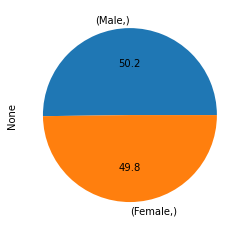

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ID_sex = clean_mouse_results.drop(columns=["Drug Regimen",
                                          "Age_months",
                                          "Weight (g)",
                                          "Timepoint",
                                          "Tumor Volume (mm3)",
                                          "Metastatic Sites",
                                          "Duplicate"])
ID_sex_group = ID_sex.drop_duplicates().value_counts(["Sex"])
sex_dist = pd.DataFrame(ID_sex_group)

ID_sex_group.plot.pie(y="Sex", autopct="%1.1f");

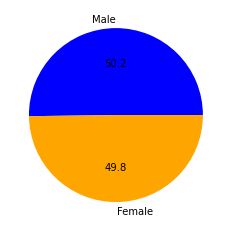

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
amount = [125, 124]
labels = ["Male", "Female"]
colors = ["blue", "orange"]

plt.pie(amount, labels=labels, colors=colors, autopct="%1.1f");


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
